In [174]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import numpy as np
import keras
import pandas as pd

In [175]:
img_height = 45
img_width = 45
train_data_dir = "/content/drive/My Drive/Google Drive/Proyectos/image classification/casting_datax2/train"
test_data_dir = "/content/drive/My Drive/Google Drive/Proyectos/image classification/casting_datax2/test"
batch_size = 24
image_size = (300, 300)

In [176]:
train_ds = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.15,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.15,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 6633 files belonging to 2 classes.
Using 5639 files for training.
Found 6633 files belonging to 2 classes.
Using 994 files for validation.


In [177]:
names = train_ds.class_names

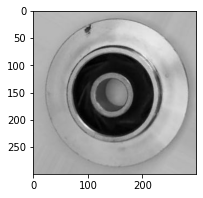

In [178]:
plt.figure(figsize=(3, 3))
for images in train_ds.take(1):
  data = images[0][0].numpy()
  plt.imshow(data.astype(np.uint8))
  plt.show()
  break

In [179]:
input_shape = (None, 300, 300, 3)
model = Sequential()
model.add(Rescaling(1.0 / 255))
model.add(Conv2D(256, (2, 2), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))
  
model.add(Conv2D(256, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))
  
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1, activation="sigmoid"))
  
model.compile(loss ='binary_crossentropy',
                     optimizer ='Nadam',
                   metrics =['accuracy'])

In [180]:
model.build(input_shape)
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_20 (Rescaling)     (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 299, 299, 256)     3328      
_________________________________________________________________
activation_131 (Activation)  (None, 299, 299, 256)     0         
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 149, 149, 256)     0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 148, 148, 256)     262400    
_________________________________________________________________
activation_132 (Activation)  (None, 148, 148, 256)     0         
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 74, 74, 256)     

In [ ]:
callbacks = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy")

history = model.fit(train_ds.repeat(),
    steps_per_epoch = batch_size,
    epochs = 30,
    validation_data = val_ds.repeat(),
    validation_steps = batch_size,
    callbacks=callbacks).history

Epoch 1/30
24/24 [==============================] - 16s 600ms/step - loss: 0.6985 - accuracy: 0.4782 - val_loss: 0.6852 - val_accuracy: 0.5469
Epoch 2/30
24/24 [==============================] - 14s 597ms/step - loss: 0.6879 - accuracy: 0.5570 - val_loss: 0.6852 - val_accuracy: 0.5590
Epoch 3/30
24/24 [==============================] - 14s 598ms/step - loss: 0.6812 - accuracy: 0.5687 - val_loss: 0.6674 - val_accuracy: 0.6337
Epoch 4/30
24/24 [==============================] - 14s 597ms/step - loss: 0.6807 - accuracy: 0.6424 - val_loss: 0.6466 - val_accuracy: 0.5729
Epoch 5/30
24/24 [==============================] - 14s 596ms/step - loss: 0.6537 - accuracy: 0.5966 - val_loss: 0.6809 - val_accuracy: 0.5486
Epoch 6/30
24/24 [==============================] - 14s 596ms/step - loss: 0.6561 - accuracy: 0.6025 - val_loss: 0.6165 - val_accuracy: 0.5712
Epoch 7/30
24/24 [==============================] - 14s 594ms/step - loss: 0.5602 - accuracy: 0.6779 - val_loss: 0.4448 - val_accuracy: 0.7378

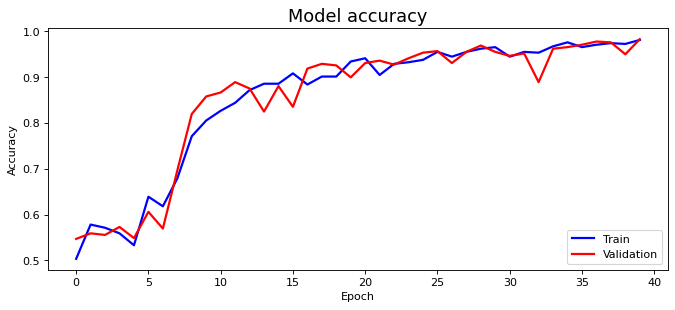

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)
ax.plot(history['accuracy'], 'b', label='Train', linewidth=2)
ax.plot(history['val_accuracy'], 'r', label='Validation', linewidth=2)
ax.set_title('Model accuracy', fontsize=16)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(loc='lower right')
plt.show()

In [ ]:
path_pred = "/content/drive/My Drive/Google Drive/Proyectos/image classification/casting_datax2/test/ok_front/cast_ok_0_16.jpeg"

In [ ]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 300, 300
img = image.load_img(path_pred, target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

In [ ]:
pred = model.predict(img)
predictions = pred.tolist()[0]

if predictions[0] > 0.5:
  prediction = "no defectuoso"
  probabilidad = predictions[0]
else:
  prediction = "defectuoso"
  probabilidad = 1 - predictions[0]


In [ ]:
print("El impulsor de la bomba sumergible es {} con una probabilidad de certeza del {:.4f}%".format(prediction, probabilidad*100))

El impulsor de la bomba sumergible es no defectuoso con una probabilidad de 98.8498%


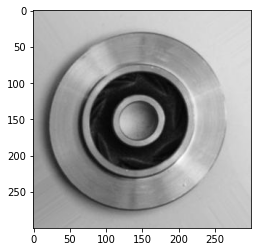

In [ ]:
plt.imshow(img.astype(np.uint8).reshape(300, 300, 3))
plt.show()